In [60]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import re
import time
from datetime import date
from datetime import timedelta
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 
import seaborn as sns

In [6]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [11]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [17]:
df1 = diabetes

In [18]:
df1

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [20]:
df = pd.DataFrame(df1.data)

In [23]:
df.columns = df1.feature_names

In [25]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [26]:
## Independent feature and dependent features
X = df
y = df1.target

In [29]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# X_train(features) and y_train(features) use for model training 
# X_test(labels) and y_test(labels) for model testing
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.30, shuffle=True)

In [32]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
135,-0.005515,-0.044642,0.056307,-0.036656,-0.048351,-0.042963,-0.072854,0.037999,0.050782,0.056912
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025953,-0.001078
329,-0.012780,0.050680,-0.055785,-0.002228,-0.027712,-0.029184,0.019187,-0.039493,-0.017056,0.044485
372,-0.027310,0.050680,-0.023451,-0.015999,0.013567,0.012778,0.026550,-0.002592,-0.010903,-0.021788
54,-0.049105,-0.044642,0.025051,0.008101,0.020446,0.017788,0.052322,-0.039493,-0.041176,0.007207
...,...,...,...,...,...,...,...,...,...,...
142,0.041708,0.050680,0.012117,0.039087,0.054845,0.044406,0.004460,-0.002592,0.045604,-0.001078
251,-0.052738,0.050680,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084492,0.040343
217,0.074401,-0.044642,0.031517,0.101058,0.046589,0.036890,0.015505,-0.002592,0.033654,0.044485
193,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039542,0.019633


In [33]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470
62,-0.027310,0.050680,-0.007284,-0.040099,-0.011201,-0.013840,0.059685,-0.039493,-0.082379,-0.025930
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022517,0.007207
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
176,0.045341,0.050680,0.019662,0.039087,0.020446,0.025930,0.008142,-0.002592,-0.003301,0.019633
...,...,...,...,...,...,...,...,...,...,...
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072133,0.011349
263,-0.074533,0.050680,-0.077342,-0.046985,-0.046975,-0.032629,0.004460,-0.039493,-0.072133,-0.017646
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
349,0.001751,0.050680,-0.057941,-0.043542,-0.096510,-0.047034,-0.098625,0.034309,-0.061176,-0.071494


In [35]:
y_train

array([272.,  83., 135.,  71., 182., 236., 242.,  96., 178., 196., 200.,
       132.,  40., 245.,  77., 292., 263.,  25.,  63., 166., 126., 220.,
        94.,  51.,  81.,  84.,  97., 202., 103., 225., 197., 243.,  72.,
        75.,  47.,  44., 173., 167., 214.,  91., 308.,  90., 217., 281.,
        97., 150.,  83.,  63., 288., 109.,  95., 277., 275.,  60.,  42.,
       272.,  88., 121., 172., 142., 265., 183.,  68.,  72., 171., 321.,
       180., 233., 138., 143., 145., 122., 101.,  87., 151.,  99., 140.,
        63., 332., 311.,  71., 101., 209., 127., 185.,  66., 110.,  42.,
       259., 144., 132.,  60., 265., 107., 302.,  96., 131., 215., 237.,
       173., 257., 244.,  72.,  97., 114.,  89., 103.,  72.,  55., 170.,
       310., 258., 258., 262.,  68.,  48., 191., 177.,  86., 174., 257.,
       104., 150.,  52., 187., 249., 346., 104.,  45., 115.,  74., 341.,
       283., 163., 153.,  70.,  74., 144., 125., 109., 118., 143.,  79.,
        53., 124.,  58.,  73.,  90., 142.,  63., 16

In [34]:
y_test

array([310.,  52.,  49., 144., 237., 279., 220.,  55., 128., 127., 248.,
       281., 281.,  43., 131., 233., 275.,  71.,  60., 142., 168., 214.,
       336., 222., 142., 190., 141., 181., 104.,  65., 229., 134.,  66.,
       197.,  84., 303., 155., 198.,  95., 147.,  65.,  65.,  88., 168.,
       128., 245.,  71.,  64., 220.,  93.,  81.,  71., 128., 137., 160.,
       262., 225., 306.,  97.,  85.,  90., 217.,  59., 202., 208., 131.,
        49., 259., 137.,  31.,  65., 241., 192.,  52., 160., 158.,  72.,
       152., 180.,  48., 151., 206., 297.,  84., 189.,  88., 140., 184.,
       115., 190.,  55., 100., 186., 310., 111., 275.,  94., 317., 242.,
       185.,  59., 174., 232., 128., 102.,  61., 156.,  59., 210.,  64.,
       151., 178., 124., 123., 139.,  90., 263., 178.,  67.,  83., 233.,
       129.,  85.,  89., 131., 196., 198., 172.,  98., 116., 295.,  88.,
        39.])

In [ ]:
#Standardizing the dataset

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
# scaler.inverse_transform(X_train)
# scaler.inverse_transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [52]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
mse = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 10)

In [48]:
np.mean(mse)

-3311.5854400476155

##prediction 

In [53]:
reg_pred = regression.predict(X_test)

In [54]:
reg_pred

array([255.85191878,  67.57994016,  98.61507842, 183.69749791,
       160.14036157, 215.11035417, 211.86811469,  72.01621467,
       103.18298671, 117.45428798, 205.64398013, 227.70335992,
       193.86216853,  65.43352608, 168.35263236, 196.89765005,
       248.90505334,  86.57314789, 123.50483352, 143.95907974,
       143.47139166, 131.26245457, 252.1848496 , 199.26491886,
       187.90287604, 173.30108769, 174.71862604, 177.13793243,
        40.98871184,  99.29456224, 189.10446243,  74.82927834,
       120.79033425, 152.57463757, 181.67666361, 256.93855313,
       219.91168246, 162.82914252, 149.11477625, 176.31125541,
       129.14228849,  57.94480845, 114.18179037, 140.52028473,
        75.37674985, 244.85717657,  87.75332771, 113.70303889,
       194.36359204,  86.05982132, 141.83542926, 122.07858584,
       229.43718506, 199.91434646, 113.17159829, 157.21041942,
       167.54923988, 249.12041375, 113.38842472, 155.87098777,
       143.60561657, 236.59466935, 126.23999705, 190.85

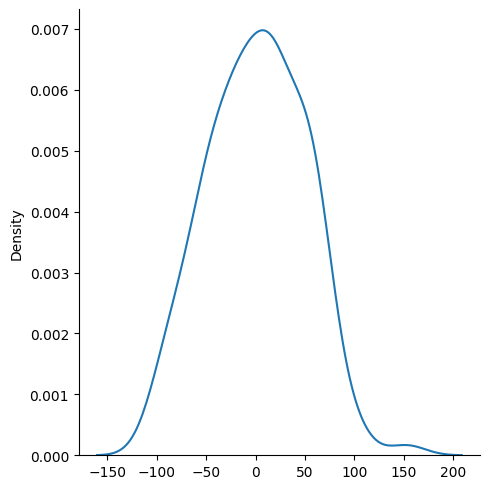

In [63]:
sns.displot(reg_pred - y_test,kind = 'kde')